# Titanic Survivor Prediction

In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
train_df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [3]:
train_df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [4]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Let's Visualise some of the important features

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [8]:
corr=train_df.corr()

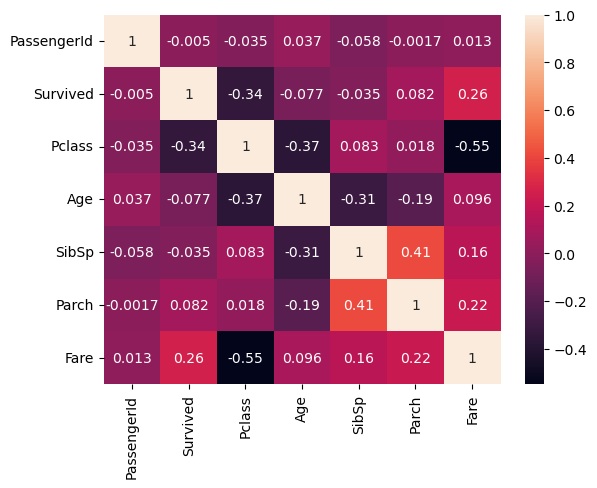

In [9]:
sns.heatmap(corr,annot=True);

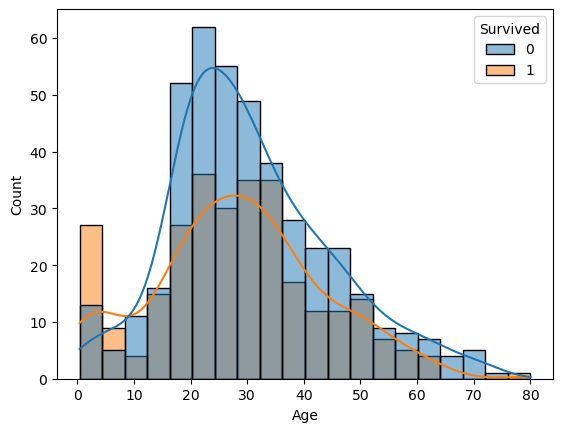

In [10]:
sns.histplot(data=train_df,x='Age',kde=True,hue='Survived');

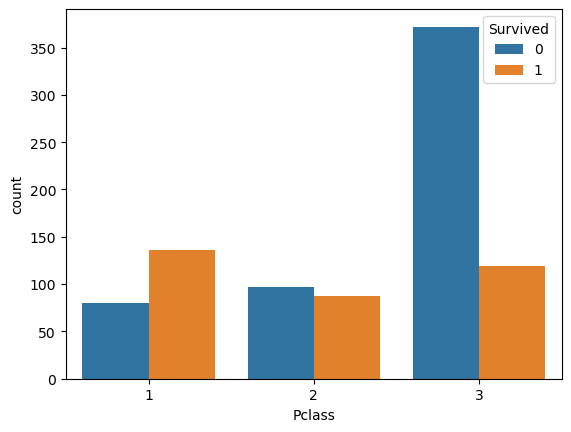

In [11]:
sns.countplot(data=train_df,x='Pclass',hue='Survived');

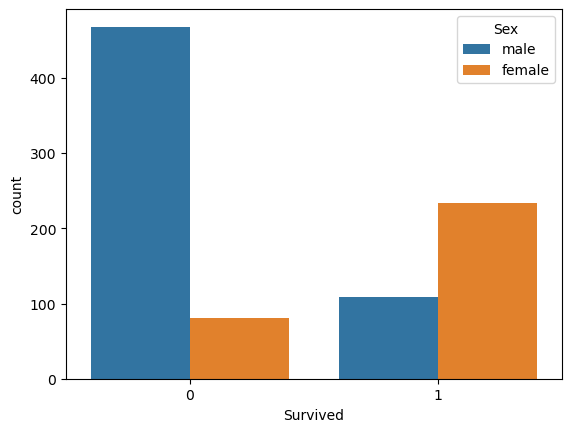

In [12]:
sns.countplot(data=train_df,x='Survived',hue='Sex');

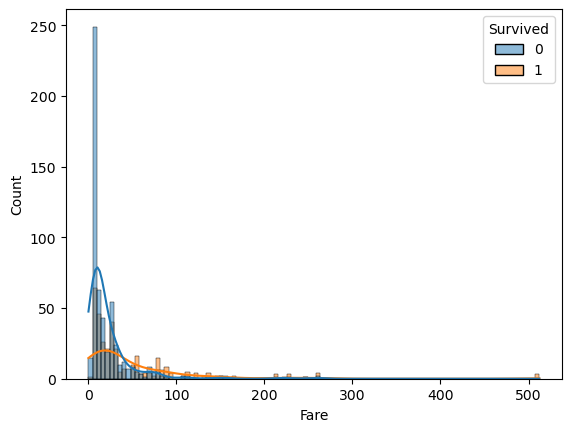

In [13]:
sns.histplot(data=train_df,x='Fare',hue='Survived',kde=True);

## Some Important Conclusions

* Young people in the age 25-28 and children have more survival rate
* Females have more survival chance as compared to men, hence the quote" Women and Children First"
* Passengers form upper class, i.e class 1 have more survival chance.

## Let's perform some data cleaning

In [14]:
test_id=test_df.PassengerId
test_id

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [15]:
def clean(data):
    data = data.drop(["Ticket", "PassengerId", "Name", "Cabin"], axis=1)
    
    cols = ["SibSp", "Parch", "Fare", "Age"]
    for col in cols:
        data[col].fillna(data[col].median(), inplace=True)
        
    data.Embarked.fillna("U", inplace=True)
    return data

train_df = clean(train_df)
test_df = clean(test_df)

In [16]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols=["Sex","Embarked"]
for col in cols:
    train_df[col]=le.fit_transform(train_df[col])
    test_df[col]=le.fit_transform(test_df[col])
    print(le.classes_)
train_df.head()

['female' 'male']
['C' 'Q' 'S']


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


# Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
Y=train_df["Survived"]
X=train_df.drop("Survived",axis=1)
x_train,x_val,y_train,y_val=train_test_split(X,Y,test_size=0.2,random_state=42)

In [19]:
x_train.shape,x_val.shape

((712, 7), (179, 7))

In [20]:
y_train.shape,y_val.shape

((712,), (179,))

In [21]:
model=LogisticRegression(max_iter=50000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=50000)

In [22]:
train_pred=model.predict(x_train)

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [24]:
train_score=accuracy_score(y_train,train_pred)
train_score

0.800561797752809

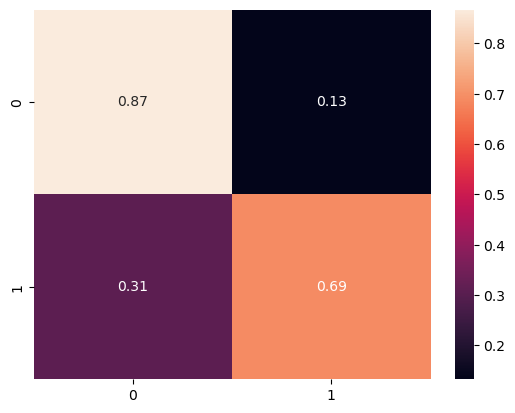

In [25]:
sns.heatmap(confusion_matrix(y_train,train_pred,normalize='true'),annot=True);

Precision=0.8416 
Recall=0.69

In [26]:
val_pred=model.predict(x_val)
val_score=accuracy_score(y_val,val_pred)
val_score

0.8100558659217877

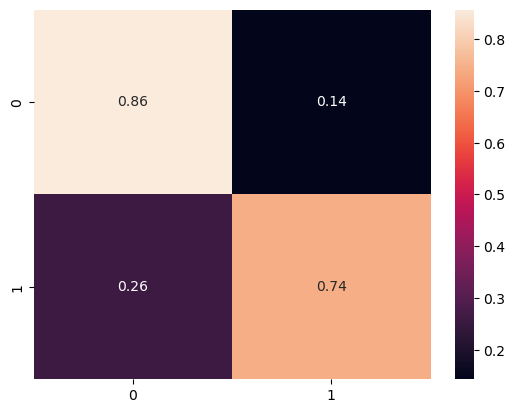

In [27]:
sns.heatmap(confusion_matrix(y_val,val_pred,normalize='true'),annot=True);

Precision=0.84
Recall=0.74

# Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators=100,bootstrap=True)

In [29]:
model2.fit(x_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [30]:
rf_train_score=model2.score(x_train,y_train)
rf_train_score

0.9789325842696629

In [31]:
rf_val_score=model2.score(x_val,y_val)
rf_val_score

0.8212290502793296

In [32]:
model2.estimators_[0].tree_.max_depth

17

In [33]:
from sklearn.tree import plot_tree,export_text

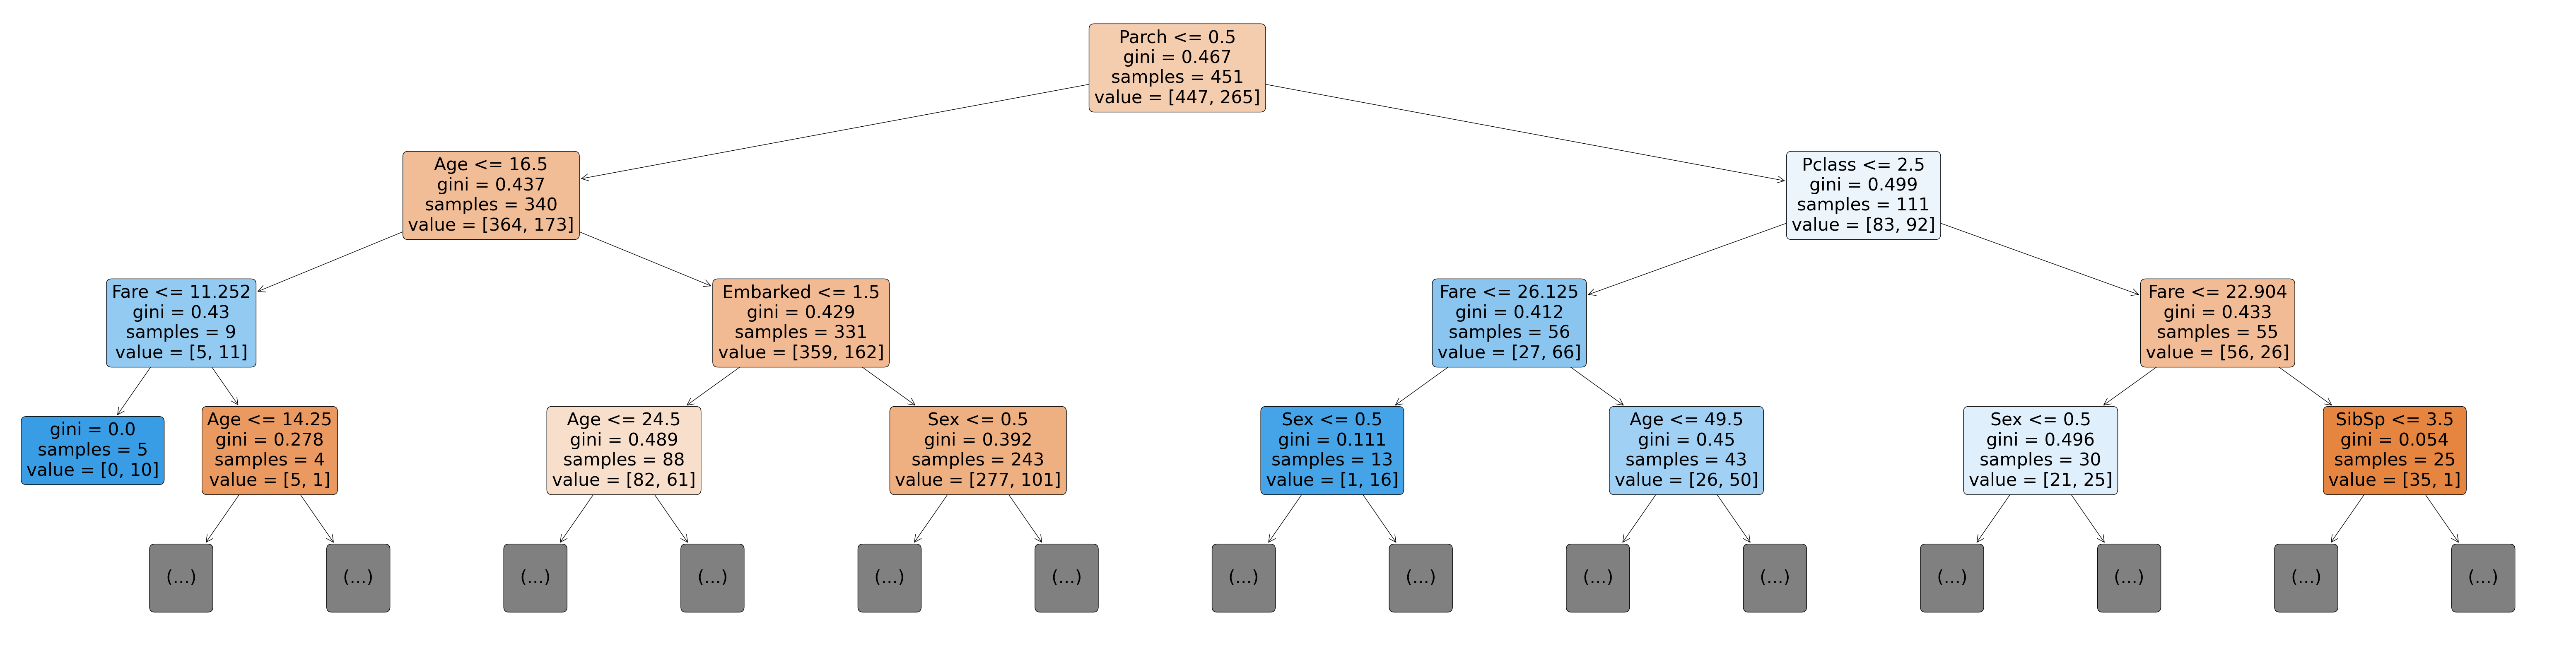

In [34]:
plt.figure(figsize=(80,20))
plot_tree(model2.estimators_[0],max_depth=3, feature_names=x_train.columns,filled=True,rounded=True);

In [35]:
def max_depth_error(md):
    model=RandomForestClassifier(n_jobs=-1,max_depth=md,random_state=42)
    model.fit(x_train,y_train)
    train_acc=1-model.score(x_train,y_train)
    val_acc=1-model.score(x_val,y_val)
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [36]:
error_df=pd.DataFrame([max_depth_error(md) for md in range (1,20)])

In [37]:
error_df.head()

,Max Depth,Training Error,Validation Error
0,1,0.200843,0.229050
1,2,0.192416,0.217877
2,3,0.161517,0.195531
3,4,0.151685,0.184358
4,5,0.143258,0.195531


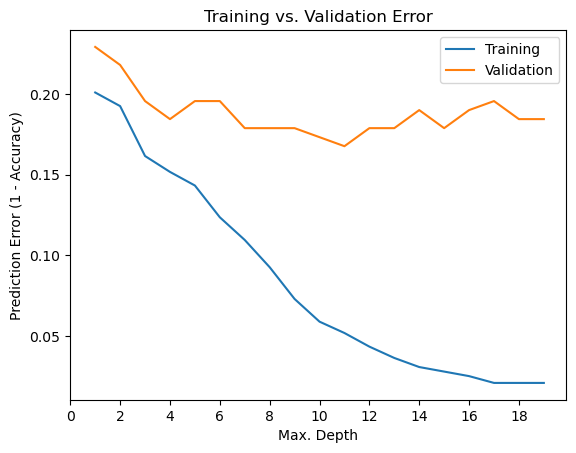

In [38]:
plt.figure()
plt.plot(error_df['Max Depth'],error_df['Training Error'])
plt.plot(error_df['Max Depth'],error_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,20,2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation']);

In [39]:
def test_other_parmams(**params):
    model=RandomForestClassifier(**params,n_jobs=-1,random_state=42)
    model.fit(x_train,y_train)
    return {'Training Score':model.score(x_train,y_train),'Validation Score':model.score(x_val,y_val)}

In [40]:
test_other_parmams(max_leaf_nodes=512)

{'Training Score': 0.9789325842696629, 'Validation Score': 0.8212290502793296}

In [41]:
test_other_parmams(max_depth=11)

{'Training Score': 0.9480337078651685, 'Validation Score': 0.8324022346368715}

In [42]:
test_other_parmams(min_samples_split=5)

{'Training Score': 0.9325842696629213, 'Validation Score': 0.8435754189944135}

### Final Random Forest Model

In [43]:
model3=RandomForestClassifier(random_state=42,max_leaf_nodes=512,max_depth=11,n_jobs=-1)
model3.fit(x_train,y_train)
print('Training score:',model3.score(x_train,y_train))
print('Validation score:',model3.score(x_val,y_val))

Training score: 0.949438202247191
Validation score: 0.8324022346368715


##### As we can see our model's training accuracy is less as compared to Logistic model. However we have improved our model's cross validation acuracy from 80 to 83

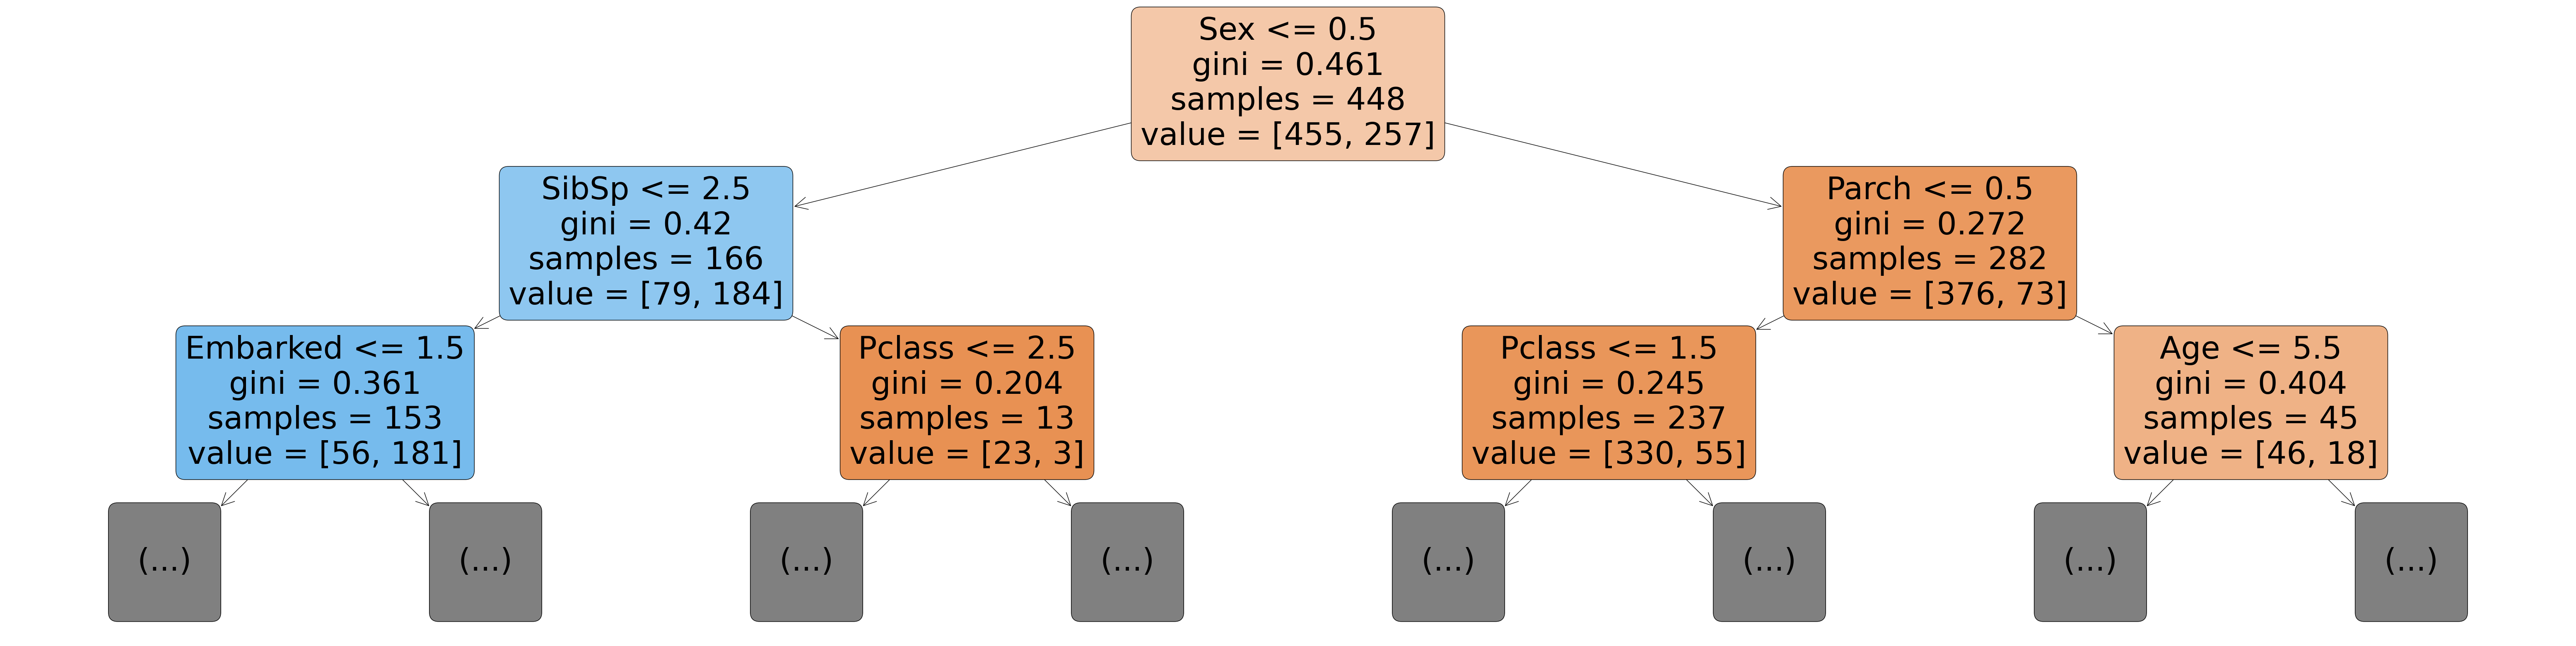

In [44]:
plt.figure(figsize=(80,20));
plot_tree(model3.estimators_[10],max_depth=2, feature_names=x_train.columns,filled=True,rounded=True);


In [45]:
model3.estimators_[0].tree_.max_depth

11

In [46]:
submission=model3.predict(test_df)

In [47]:
submission_df=pd.DataFrame({"PassengerId":test_id,"Survived":submission})

In [48]:
submission_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [49]:
submission_df.to_csv("submission.csv",index=False)